In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.stem.porter import PorterStemmer

# Reading the data and performing preprocessing

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shashankkatoch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('spam_data.csv')
df.head()
ps = PorterStemmer()

In [4]:
#now we will get rid of unwanted things 
df['text'] = df['text'].map(lambda text: re.sub('[^A-Za-z0-9]+', ' ',str(text))).apply(lambda x: (x.lower()).split())
df['text'] = df['text'].map(lambda text: text[1:])
corpus=df['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

In [5]:
df.iloc[1]

text    [the, stock, trading, gunslinger, fanny, is, m...
spam                                                    1
Name: 1, dtype: object

In [6]:
corpus.head()

0    natur irresist corpor ident lt realli hard rec...
1    stock trade gunsling fanni merril muzo colza a...
2    unbeliev new home made easi im want show homeo...
3    4 color print special request addit inform cli...
4    money get softwar cd softwar compat great grow...
Name: text, dtype: object

In [7]:
# converting the strings into numbers so that we can fit the model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()
y = df.iloc[:, 1].values

In [8]:
X.shape , y.shape

((5728, 29222), (5728,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)

MultinomialNB()

In [11]:
X_test[1]

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred.shape

(1146,)

<AxesSubplot:>

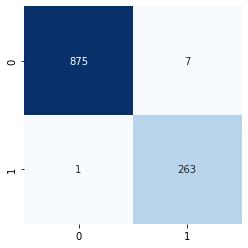

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9930191972076788

In [28]:
a = "I would like to contact you for some work"

def get_Proper_words(text):
    p = list(filter(lambda text:text not in set(stopwords.words('english')),text))
    final = " ".join(list(map(lambda word:ps.stem(word),p)))
    return final
    

def cleanUp(text):
    return re.sub('[^A-Za-z0-9]+', ' ',text)
    
def preprocess(a):
    a = cleanUp(a)
    a = a.lower()
    k = a.split()
    final = get_Proper_words(k)
    return final  

In [29]:
k = preprocess(a)
print(k)

would like contact work


In [30]:
type(k)

str

In [31]:
k = [k]
print(k)
X = cv.transform(k)
# X.reshape(1,-1)
print(X)

['would like contact work']
  (0, 8185)	1
  (0, 16408)	1
  (0, 28570)	1
  (0, 28616)	1


In [20]:
y_pred = classifier.predict(X)

In [21]:
print(y_pred)
print(y_pred[0])

[0]
0


In [32]:
import pickle

file = open('model.pkl','wb')

pickle.dump(classifier,file)
pickle.dump(cv,open('vectorizer.pkl','wb'))